In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
data_post2021 = pd.read_csv("data_post2021.csv", low_memory = False)

In [3]:
data_post2021

,CampaignID,Cust_ID,Call_Start,Call_End,Call_Result,Connection_ID,Emp_ID,Call_Time_seconds,avg_est_income,avg_bal_01,...,CancelledDate,HistoryID,InceptionDateCorrected,ImportedDate,Campaign_Type,ListSegment,Team_ID,EmploymentDate,Employee_Gender,Race
0,B8168,2919.0,2021-01-04 08:36:53.870,2021-01-04 08:37:27.197,call back no presentation,2.129662e+09,8992.0,33.327,NaN,NaN,...,NaN,NaN,NaN,NaN,Acquisition,3.0,301.0,2008-07-24 09:25:46.560,F,A
1,B8168,2919.0,2021-01-04 15:50:08.380,2021-01-04 15:50:14.547,phone not answered / client does not speak,0.000000e+00,8992.0,6.167,NaN,NaN,...,NaN,NaN,NaN,NaN,Acquisition,3.0,301.0,2008-07-24 09:25:46.560,F,A
2,B8168,2919.0,2021-01-05 08:30:32.697,2021-01-05 08:31:28.167,call back no presentation,2.129782e+09,8992.0,55.470,NaN,NaN,...,NaN,NaN,NaN,NaN,Acquisition,3.0,301.0,2008-07-24 09:25:46.560,F,A
3,B8168,2919.0,2021-01-05 15:45:57.897,2021-01-05 15:46:11.643,phone not answered / client does not speak,0.000000e+00,8992.0,13.746,NaN,NaN,...,NaN,NaN,NaN,NaN,Acquisition,3.0,301.0,2008-07-24 09:25:46.560,F,A
4,B8168,2919.0,2021-01-07 13:57:47.107,2021-01-07 13:57:50.830,phone not answered / client does not speak,0.000000e+00,8992.0,3.723,NaN,NaN,...,NaN,NaN,NaN,NaN,Acquisition,3.0,301.0,2008-07-24 09:25:46.560,F,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146629,B8356,38843.0,2021-07-25 07:01:34.300,2021-07-25 07:23:37.710,pending misrepresentation: questions - benefits,NaN,12520.0,1323.410,5028.17,3656.0,...,NaN,63063.0,2021-08-11 00:00:00.000,2021-09-28 14:02:27.377,Acquisition,1.0,243.0,2013-02-04 08:45:56.530,F,A
1146630,B8356,38843.0,2021-07-25 07:29:33.120,2021-07-25 07:29:34.970,pending misrepresentation: questions - costs,NaN,12520.0,1.850,5028.17,3656.0,...,NaN,63063.0,2021-08-11 00:00:00.000,2021-09-28 14:02:27.377,Acquisition,1.0,243.0,2013-02-04 08:45:56.530,F,A
1146631,B8356,65080.0,2021-07-24 14:52:25.297,2021-07-24 15:17:01.853,pending verification:debit dates,NaN,12520.0,1476.556,53666.00,11652.0,...,NaN,108421.0,2021-07-28 00:00:00.000,2021-09-28 14:02:27.377,Acquisition,1.0,243.0,2013-02-04 08:45:56.530,F,A
1146632,B8356,65080.0,2021-07-24 14:52:25.297,2021-07-24 15:17:01.853,pending verification:debit dates,NaN,12520.0,1476.556,53666.00,11652.0,...,NaN,108422.0,2019-01-23 00:00:00.000,2021-09-28 14:02:27.377,Acquisition,1.0,243.0,2013-02-04 08:45:56.530,F,A


In [4]:
data_post2021["Cust_Sex"].unique()

array(['M', 'F'], dtype=object)

In [5]:
data_post2021["Postal_Code"].head()

# postal code won't help because there's too many locations

0    7441
1    7441
2    7441
3    7441
4    7441
Name: Postal_Code, dtype: object

In [6]:
data_post2021.isnull().sum()

CampaignID                      0
Cust_ID                         0
Call_Start                      0
Call_End                        0
Call_Result                     0
Connection_ID               31331
Emp_ID                          0
Call_Time_seconds               0
avg_est_income             167785
avg_bal_01                 161297
avg_bal_avail              158636
Marital_Status             164018
wage_earner                158636
ID_No                           0
Postal_Code                    49
Cust_Sex                        0
Lang                           55
Batch_ID                     5177
Age                             0
Policy_no                 1008902
Sale_Status               1008902
Sale_date                 1008902
Verified_Date             1051017
Family_To_Cover           1008902
Premium                   1008902
Effective_Date            1008902
Date_of_Debit             1009107
Cover_Amount              1044758
Product_Category           726455
Benefit_Level 

In [7]:
grouped_data = data_post2021.groupby(["CampaignID", "Cust_ID"]).sum()
grouped_data

Connection_ID    Emp_ID  Call_Time_seconds  \
CampaignID Cust_ID                                               
B8168      2919.0    1.064953e+10  153696.0            189.906   
           6386.0    0.000000e+00  237518.0             58.572   
           8755.0    2.129659e+09   17984.0            178.151   
           57823.0   4.259353e+09  173362.0            139.617   
           78340.0   0.000000e+00    2293.0              5.390   
...                           ...       ...                ...   
B8461      306.0     4.910619e+09   57525.0             75.587   
           308.0     1.636607e+09   19175.0             98.610   
           309.0     1.636798e+09   19175.0            525.380   
           311.0     3.274343e+09   38350.0              6.980   
           313.0     1.636591e+09   19175.0            533.500   

                    avg_est_income  avg_bal_01  avg_bal_avail  wage_earner  \
CampaignID Cust_ID                                                           
B8168      2919.0              0.0         0.0            0.0          0.0   
           6386.0              0.0         0.0            0.0          0.0   
           8755.0              0.0         0.0            0.0          0.0   
           57823.0        210770.0     -5460.0        -4140.0          0.0   
           78340.0         42672.0         0.0         1076.8          0.0   
...                            ...         ...            ...          ...   
B8461      306.0          165000.0       -75.0         1033.2          0.0   
           308.0           53702.5     -1844.0          888.2          0.0   
           309.0           61241.0         0.0         7097.2          0.0   
           311.0           46000.0     20160.0        27110.0          0.0   
           313.0               0.0         0.0         3389.8          0.0   

                    Batch_ID     Age  Premium  Cover_Amount  Benefit_Level  \
CampaignID Cust_ID                                                           
B8168      2919.0        0.0  1026.0  1881.76     4750000.0            0.0   
           6386.0        0.0  1700.0  3921.90    10200000.0     10200000.0   
           8755.0        0.0    80.0   230.70      600000.0       600000.0   
           57823.0       0.0   880.0  2843.00     8000000.0            0.0   
           78340.0       0.0    54.0    99.04      250000.0       250000.0   
...                      ...     ...      ...           ...            ...   
B8461      306.0         0.0   123.0     0.00           0.0            0.0   
           308.0         0.0    40.0     0.00           0.0            0.0   
           309.0         0.0    33.0     0.00           0.0            0.0   
           311.0         0.0    74.0     0.00           0.0            0.0   
           313.0         0.0    23.0     0.00           0.0            0.0   

                    HistoryID  ListSegment  Team_ID  
CampaignID Cust_ID                                   
B8168      2919.0         0.0         57.0   4947.0  
           6386.0   4821081.0        102.0   7984.0  
           8755.0     93410.0          6.0    602.0  
           57823.0        0.0         60.0   5098.0  
           78340.0    46937.0          3.0    226.0  
...                       ...          ...      ...  
B8461      306.0          0.0          9.0    864.0  
           308.0          0.0          3.0    288.0  
           309.0          0.0          3.0    288.0  
           311.0          0.0          6.0    576.0  
           313.0          0.0          3.0    288.0  

[334364 rows x 15 columns]

In [8]:
grouped_data = grouped_data.drop(columns = ["Connection_ID", "Emp_ID", "avg_est_income", "avg_bal_01", 
                                            "avg_bal_avail", "wage_earner", "Batch_ID", "Age", "Premium", "Cover_Amount",
                                           "Benefit_Level", "HistoryID", "ListSegment", "Team_ID"])

In [9]:
grouped_data

Call_Time_seconds
CampaignID Cust_ID                   
B8168      2919.0             189.906
           6386.0              58.572
           8755.0             178.151
           57823.0            139.617
           78340.0              5.390
...                               ...
B8461      306.0               75.587
           308.0               98.610
           309.0              525.380
           311.0                6.980
           313.0              533.500

[334364 rows x 1 columns]

In [10]:
merged = pd.merge(data_post2021, grouped_data, on = ['CampaignID', 'Cust_ID'], how = 'outer')

In [11]:
merged

,CampaignID,Cust_ID,Call_Start,Call_End,Call_Result,Connection_ID,Emp_ID,Call_Time_seconds_x,avg_est_income,avg_bal_01,...,HistoryID,InceptionDateCorrected,ImportedDate,Campaign_Type,ListSegment,Team_ID,EmploymentDate,Employee_Gender,Race,Call_Time_seconds_y
0,B8168,2919.0,2021-01-04 08:36:53.870,2021-01-04 08:37:27.197,call back no presentation,2.129662e+09,8992.0,33.327,NaN,NaN,...,NaN,NaN,NaN,Acquisition,3.0,301.0,2008-07-24 09:25:46.560,F,A,189.906
1,B8168,2919.0,2021-01-04 15:50:08.380,2021-01-04 15:50:14.547,phone not answered / client does not speak,0.000000e+00,8992.0,6.167,NaN,NaN,...,NaN,NaN,NaN,Acquisition,3.0,301.0,2008-07-24 09:25:46.560,F,A,189.906
2,B8168,2919.0,2021-01-05 08:30:32.697,2021-01-05 08:31:28.167,call back no presentation,2.129782e+09,8992.0,55.470,NaN,NaN,...,NaN,NaN,NaN,Acquisition,3.0,301.0,2008-07-24 09:25:46.560,F,A,189.906
3,B8168,2919.0,2021-01-05 15:45:57.897,2021-01-05 15:46:11.643,phone not answered / client does not speak,0.000000e+00,8992.0,13.746,NaN,NaN,...,NaN,NaN,NaN,Acquisition,3.0,301.0,2008-07-24 09:25:46.560,F,A,189.906
4,B8168,2919.0,2021-01-07 13:57:47.107,2021-01-07 13:57:50.830,phone not answered / client does not speak,0.000000e+00,8992.0,3.723,NaN,NaN,...,NaN,NaN,NaN,Acquisition,3.0,301.0,2008-07-24 09:25:46.560,F,A,189.906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146629,B8356,8784.0,2021-07-23 14:49:21.290,2021-07-23 14:56:00.350,not interested,1.631197e+09,19842.0,399.060,NaN,205306.0,...,NaN,NaN,NaN,Acquisition,1.0,244.0,2020-09-10 13:17:28.820,M,A,399.060
1146630,B8356,9205.0,2021-07-23 14:32:28.710,2021-07-23 14:37:16.837,not interested,1.631191e+09,19842.0,288.127,41000.0,10882.0,...,NaN,NaN,NaN,Acquisition,1.0,244.0,2020-09-10 13:17:28.820,M,A,288.127
1146631,B8356,14370.0,2021-07-23 14:09:17.720,2021-07-23 14:11:33.190,not interested,1.631183e+09,19842.0,135.470,60045.0,13863.0,...,NaN,NaN,NaN,Acquisition,1.0,244.0,2020-09-10 13:17:28.820,M,A,135.470
1146632,B8356,28458.0,2021-07-23 14:47:05.860,2021-07-23 14:47:57.013,language barrier afrikaans,1.631196e+09,19842.0,51.153,NaN,-2962.0,...,NaN,NaN,NaN,Acquisition,1.0,244.0,2020-09-10 13:17:28.820,M,A,51.153


In [12]:
sns.set_style("white")

In [13]:
merged = merged.rename(columns = {"Call_Time_seconds_y": "Total_Call_Time_seconds"})

In [14]:
merged = merged.drop_duplicates(
  subset = ['CampaignID', 'Cust_ID'],
  keep = 'last').reset_index(drop = True)

merged

,CampaignID,Cust_ID,Call_Start,Call_End,Call_Result,Connection_ID,Emp_ID,Call_Time_seconds_x,avg_est_income,avg_bal_01,...,HistoryID,InceptionDateCorrected,ImportedDate,Campaign_Type,ListSegment,Team_ID,EmploymentDate,Employee_Gender,Race,Total_Call_Time_seconds
0,B8168,2919.0,2021-01-13 17:59:46.590,2021-01-13 17:59:48.000,client cancelled sale,0.000000e+00,2913.0,1.410,NaN,NaN,...,NaN,NaN,NaN,Acquisition,3.0,226.0,2006-11-07 12:12:28.187,F,C,189.906
1,B8168,6386.0,2021-01-13 17:56:57.353,2021-01-13 17:56:58.867,client cancelled sale,0.000000e+00,2913.0,1.514,NaN,NaN,...,141797.0,2019-01-17 00:00:00.000,2021-09-28 14:02:27.377,Acquisition,3.0,226.0,2006-11-07 12:12:28.187,F,C,58.572
2,B8168,8755.0,2021-01-04 08:25:09.183,2021-01-04 08:25:43.147,verified sale,0.000000e+00,8992.0,33.964,NaN,NaN,...,46705.0,2021-01-05 00:00:00.000,2021-09-28 14:02:27.377,Acquisition,3.0,301.0,2008-07-24 09:25:46.560,F,A,178.151
3,B8168,57823.0,2021-01-13 17:57:58.430,2021-01-13 17:57:59.697,client cancelled sale,0.000000e+00,2913.0,1.267,10538.5,-273.0,...,NaN,NaN,NaN,Acquisition,3.0,226.0,2006-11-07 12:12:28.187,F,C,139.617
4,B8168,78428.0,2021-01-04 13:16:14.800,2021-01-04 13:16:40.253,verified sale,NaN,16218.0,25.453,50000.0,NaN,...,46389.0,2021-01-01 00:00:00.000,2021-09-28 14:02:27.377,Acquisition,3.0,226.0,2017-05-19 08:41:11.427,F,A,130.343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334359,B8356,8784.0,2021-07-23 14:49:21.290,2021-07-23 14:56:00.350,not interested,1.631197e+09,19842.0,399.060,NaN,205306.0,...,NaN,NaN,NaN,Acquisition,1.0,244.0,2020-09-10 13:17:28.820,M,A,399.060
334360,B8356,9205.0,2021-07-23 14:32:28.710,2021-07-23 14:37:16.837,not interested,1.631191e+09,19842.0,288.127,41000.0,10882.0,...,NaN,NaN,NaN,Acquisition,1.0,244.0,2020-09-10 13:17:28.820,M,A,288.127
334361,B8356,14370.0,2021-07-23 14:09:17.720,2021-07-23 14:11:33.190,not interested,1.631183e+09,19842.0,135.470,60045.0,13863.0,...,NaN,NaN,NaN,Acquisition,1.0,244.0,2020-09-10 13:17:28.820,M,A,135.470
334362,B8356,28458.0,2021-07-23 14:47:05.860,2021-07-23 14:47:57.013,language barrier afrikaans,1.631196e+09,19842.0,51.153,NaN,-2962.0,...,NaN,NaN,NaN,Acquisition,1.0,244.0,2020-09-10 13:17:28.820,M,A,51.153


<AxesSubplot:xlabel='Age', ylabel='Total_Call_Time_seconds'>

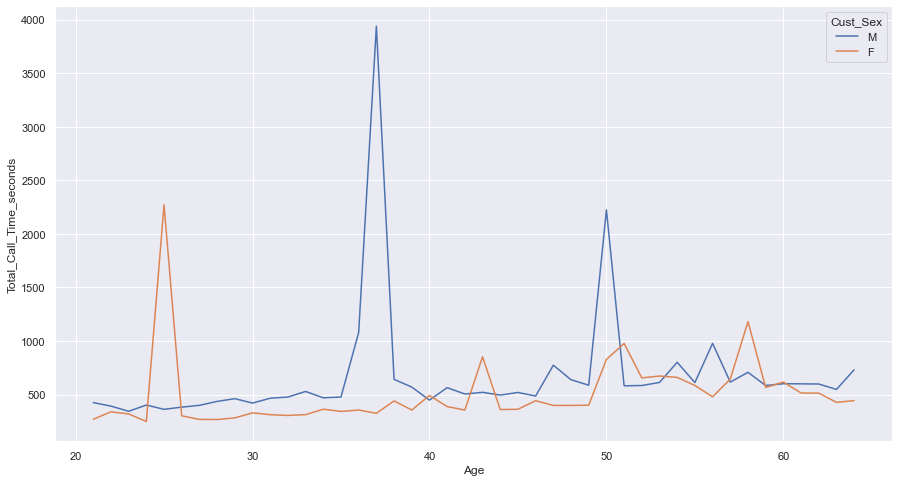

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(x = "Age", y = "Total_Call_Time_seconds", data = merged, hue = "Cust_Sex", ci = None)


In [16]:
#call_time = data_post2021.query('Call_Time_seconds <= 100')


In [17]:
#call_time_male = data_post2021[data_post2021["Cust_Sex"].str.contains("M")]

In [18]:
call_time_male = merged[merged["Cust_Sex"].str.contains("M")]
#call_time_male = call_time_male.groupby("Age").mean()

In [19]:
call_time_male = call_time_male.groupby("Age").median()
call_time_male

,Cust_ID,Connection_ID,Emp_ID,Call_Time_seconds_x,avg_est_income,avg_bal_01,avg_bal_avail,wage_earner,Batch_ID,Premium,Cover_Amount,Benefit_Level,HistoryID,ListSegment,Team_ID,Total_Call_Time_seconds
Age,,,,,,,,,,,,,,,,
21.0,37599.0,2.131054e+09,20288.0,66.0570,6718.835,3463.0,2952.6,0.0,12.0,99.040,300000.0,250000.0,422129.0,1.0,288.0,206.0200
22.0,28713.0,2.134052e+09,20292.0,55.8320,8544.830,3675.0,3299.9,0.0,13.0,121.170,250000.0,200000.0,277149.0,1.0,288.0,172.1515
23.0,35613.0,2.134225e+09,20264.0,50.4560,8998.335,3565.0,3262.2,0.0,11.0,99.040,225000.0,250000.0,362305.0,1.0,288.0,165.8680
24.0,34260.0,2.133838e+09,20264.0,45.6130,10000.000,3557.0,3150.9,0.0,10.0,99.040,200000.0,250000.0,393925.5,1.0,288.0,173.1530
25.0,34602.0,2.133650e+09,20284.0,56.3935,10446.000,3203.0,3362.8,0.0,10.0,107.195,300000.0,250000.0,358030.0,1.0,288.0,175.4015
26.0,33623.0,2.133909e+09,20258.0,51.6530,11017.500,3119.0,3008.0,0.0,10.5,99.040,250000.0,250000.0,337765.0,1.0,276.0,172.8185
27.0,34755.0,2.133891e+09,20272.0,51.7740,11110.000,2717.5,2665.8,0.0,11.0,99.040,250000.0,250000.0,372500.0,1.0,288.0,175.5630
28.0,35493.0,2.133872e+09,20258.0,48.7550,11470.830,2406.0,2502.9,0.0,11.0,99.040,250000.0,250000.0,355255.5,1.0,288.0,179.3235
29.0,33986.5,2.133412e+09,20277.0,54.4650,12228.000,2524.0,2599.7,0.0,11.0,99.040,250000.0,200000.0,395326.0,1.0,288.0,181.8955


In [20]:
call_time_female = merged[merged["Cust_Sex"].str.contains("F")]
call_time_female = call_time_female.groupby("Age").median()
call_time_female

,Cust_ID,Connection_ID,Emp_ID,Call_Time_seconds_x,avg_est_income,avg_bal_01,avg_bal_avail,wage_earner,Batch_ID,Premium,Cover_Amount,Benefit_Level,HistoryID,ListSegment,Team_ID,Total_Call_Time_seconds
Age,,,,,,,,,,,,,,,,
21.0,32255.0,2.131056e+09,20348.0,57.5230,6479.330,3642.0,2833.0,0.0,10.0,99.040,200000.0,200000.0,213763.0,1.0,288.0,123.9600
22.0,32010.0,2.134232e+09,20274.0,44.4070,7809.415,3494.0,3162.2,0.0,10.0,107.195,250000.0,250000.0,341432.0,1.0,288.0,173.5370
23.0,33763.0,2.134664e+09,20254.0,50.1900,10000.000,3743.0,3396.4,0.0,10.0,107.195,175000.0,200000.0,350797.0,1.0,288.0,144.9150
24.0,34713.0,2.134385e+09,20268.0,50.9230,10119.000,3647.0,3600.0,0.0,11.0,99.040,200000.0,250000.0,372085.0,1.0,288.0,150.3360
25.0,35170.5,2.134012e+09,20261.0,44.0900,11169.000,3522.0,3470.4,0.0,11.0,99.040,200000.0,200000.0,390092.0,1.0,288.0,138.2420
26.0,34442.0,2.133301e+09,20265.0,49.3840,12254.000,3599.0,3485.6,0.0,11.0,99.040,250000.0,200000.0,316417.0,1.0,276.0,149.1960
27.0,34996.0,2.133543e+09,20269.0,44.2860,12809.000,3131.0,3312.4,0.0,11.0,115.350,200000.0,250000.0,373645.0,1.0,288.0,143.0310
28.0,34385.5,2.133485e+09,20275.0,46.1750,13000.000,3160.0,3329.8,0.0,11.0,99.040,200000.0,200000.0,377910.0,1.0,288.0,139.1515
29.0,35303.0,2.133330e+09,20284.0,46.8815,13000.000,2962.0,3283.0,0.0,11.0,99.040,225000.0,200000.0,371285.0,1.0,288.0,143.4510


In [21]:
call_time_female = call_time_female.query('Total_Call_Time_seconds > 0')
call_time_male = call_time_male.query('Total_Call_Time_seconds > 0')

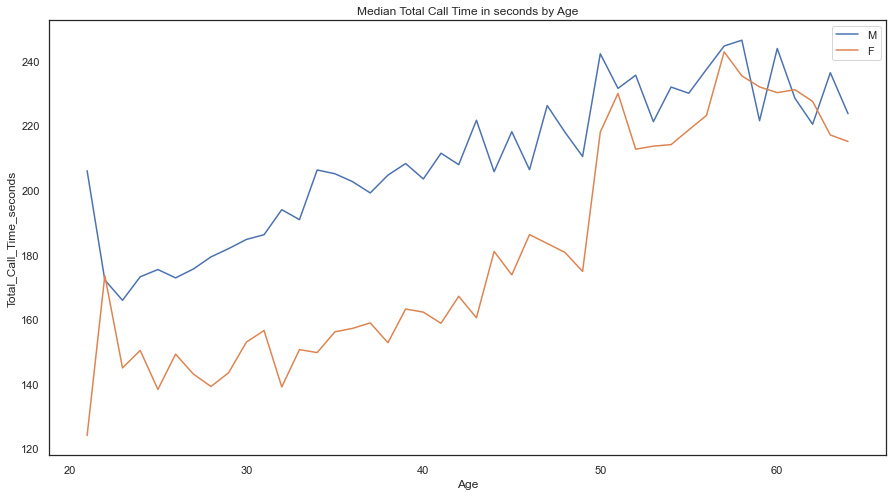

In [112]:
sns.lineplot(x = "Age", y = "Total_Call_Time_seconds", data = call_time_male)#.set(title = "Average Male Call Time in seconds")
sns.lineplot(x = "Age", y = "Total_Call_Time_seconds", data = call_time_female)#.set(title = "Average Female Call Time in seconds")
plt.legend(['M', 'F'])
plt.title("Median Total Call Time in seconds by Age")
sns.set_style("white")
# both seem to have an upward trend, with male call time having a higher slope then female call time
# there seem to be some MAJOR dips, which might be outliers

In [23]:
# split age and call time by successes to see result between call result/success and call time 

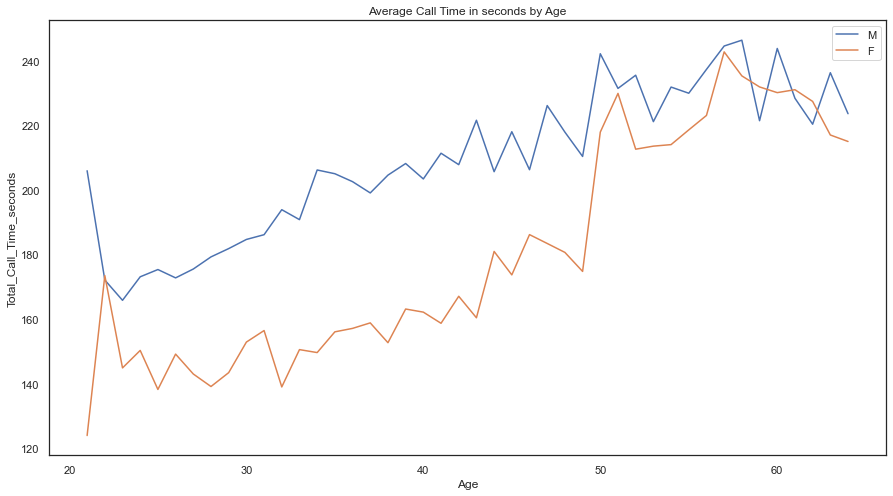

In [111]:
sns.lineplot(x = "Age", y = "Total_Call_Time_seconds", data = call_time_male)
sns.lineplot(x = "Age", y = "Total_Call_Time_seconds", data = call_time_female)
plt.legend(['M', 'F'])
plt.title("Average Call Time in seconds by Age")
sns.set_style("white")

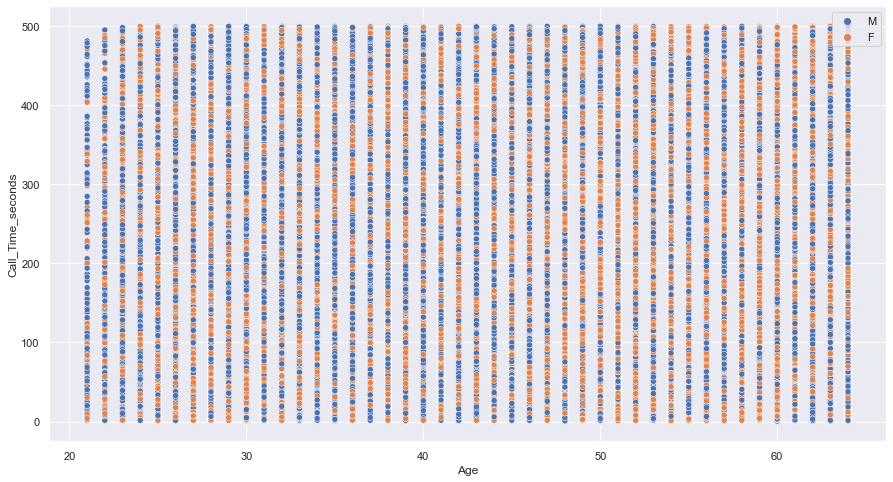

In [25]:
sns.scatterplot(x="Age", y="Call_Time_seconds", data=data_post2021.query("Call_Time_seconds <=500 and Call_Time_seconds > 0"), hue="Cust_Sex").legend(loc = "upper right") 

# Does age affect how much premium is paid?

In [26]:
premium = data_post2021[~data_post2021['Premium'].isnull()]

In [27]:
premium_young = premium.query('Age < 35')

In [28]:
premium_old = premium.query('Age >= 35')

In [29]:
avg_call_time_male = merged[merged["Cust_Sex"].str.contains("M")]
avg_call_time_male = avg_call_time_male.groupby("Age").mean()
avg_call_time_female = merged[merged["Cust_Sex"].str.contains("F")]
avg_call_time_female = avg_call_time_female.groupby("Age").mean()


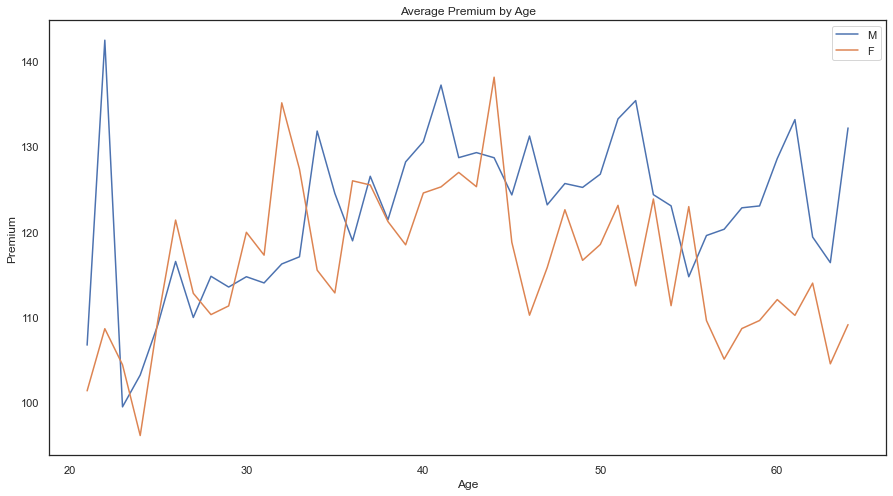

In [110]:
sns.lineplot(x = "Age", y = "Premium", data = avg_call_time_male, ci = None).set(title = "Average Premium by Age")
sns.lineplot(x = "Age", y = "Premium", data = avg_call_time_female)#.set(title = "Average Female Call Time in seconds")
plt.legend(['M', 'F'])
sns.set_style("white")
# look into why the premium value drops off

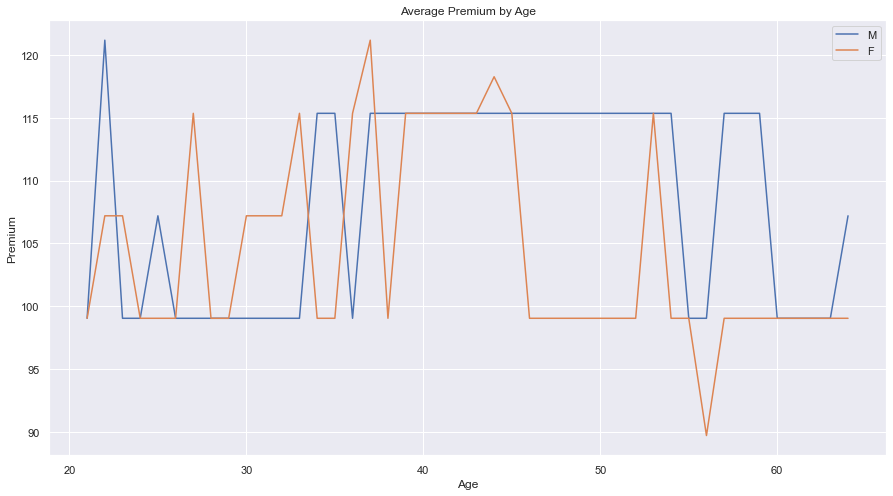

In [31]:
sns.lineplot(x = "Age", y = "Premium", data = call_time_male, ci = None).set(title = "Average Premium by Age")
sns.lineplot(x = "Age", y = "Premium", data = call_time_female)#.set(title = "Average Female Call Time in seconds")
plt.legend(['M', 'F'])

In [32]:
# takeaway: People of higher age tend to pay a higher premium, with more males paying a higher premium than females

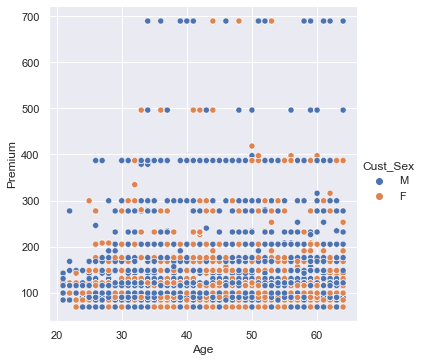

In [33]:
sns.relplot(x = "Age", y = "Premium", data = data_post2021, hue = "Cust_Sex", kind = "scatter")

In [34]:
data_post2021["Campaign_Type"].unique()

array(['Acquisition'], dtype=object)

In [35]:
# the only campaign_type in data_post 2021 is acquisition

# Does higher call time result in higher premium?

In [36]:
time_vs_premium = data_post2021[['Call_Time_seconds', 'Premium', 'Cust_Sex']]

In [37]:
data_post2021["Call_Result"].unique()

array(['call back no presentation',
       'phone not answered / client does not speak', 'sale',
       'verified sale', 'bad number', 'voice mail / answering machine',
       'call back presentation', 'client cancelled sale',
       'client not available', 'number updated', 'wrong number',
       'training', 'query', 'not interested', 'bad line',
       'client never wants to be called again\xa0',
       'language barrier venda', 'incorrectly verified',
       'invalid pending: technical issues on the sale',
       'automated message', 'invalid pending', 'pending income recovered',
       'pending misrepresentation: compulsory benefits',
       'pending: relationship/dependant details',
       'invalid pending: grey area',
       'invalid pending: sale pended incorrectly',
       'pending misrepresentation: subsidiary benefits',
       'pending requirements: child legislation', 'pending: exclusions',
       'valid pending', 'pending : id number',
       'pending: beneficiary details',

In [38]:
time_vs_premium = time_vs_premium.dropna()

In [39]:
time_vs_premium.describe()

,Call_Time_seconds,Premium
count,1.377320e+05,137732.000000
mean,5.526177e+02,121.801507
std,7.294933e+03,58.896487
min,4.000000e-02,68.740000
25%,2.616000e+00,89.710000
50%,3.050000e+01,115.350000
75%,7.575230e+02,121.170000
max,1.700603e+06,689.760000


In [40]:
merged.isnull().sum()

CampaignID                      0
Cust_ID                         0
Call_Start                      0
Call_End                        0
Call_Result                     0
Connection_ID                2132
Emp_ID                          0
Call_Time_seconds_x             0
avg_est_income               6481
avg_bal_01                   3717
avg_bal_avail                2907
Marital_Status               4808
wage_earner                  2907
ID_No                           0
Postal_Code                    25
Cust_Sex                        0
Lang                            3
Batch_ID                     1662
Age                             0
Policy_no                  326003
Sale_Status                326003
Sale_date                  326003
Verified_Date              328172
Family_To_Cover            326003
Premium                    326003
Effective_Date             326003
Date_of_Debit              326019
Cover_Amount               328681
Product_Category           285329
Benefit_Level 

In [41]:
merged_time_vs_premium = merged[["CampaignID", "Cust_ID", "Age", "Total_Call_Time_seconds", "Premium", "Cust_Sex"]]
merged_time_vs_premium

,CampaignID,Cust_ID,Age,Total_Call_Time_seconds,Premium,Cust_Sex
0,B8168,2919.0,54.0,189.906,99.04,M
1,B8168,6386.0,50.0,58.572,115.35,M
2,B8168,8755.0,40.0,178.151,115.35,M
3,B8168,57823.0,44.0,139.617,142.15,M
4,B8168,78428.0,42.0,130.343,142.15,M
...,...,...,...,...,...,...
334359,B8356,8784.0,32.0,399.060,NaN,F
334360,B8356,9205.0,51.0,288.127,NaN,M
334361,B8356,14370.0,37.0,135.470,NaN,F
334362,B8356,28458.0,52.0,51.153,NaN,F


In [42]:
merged_time_vs_premium = merged_time_vs_premium[merged_time_vs_premium['Premium'].notna()]
#merged_time_vs_premium = merged_time_vs_premium.query("Total_Call_Time_seconds < 10000")
merged_time_vs_premium

,CampaignID,Cust_ID,Age,Total_Call_Time_seconds,Premium,Cust_Sex
0,B8168,2919.0,54.0,189.906,99.04,M
1,B8168,6386.0,50.0,58.572,115.35,M
2,B8168,8755.0,40.0,178.151,115.35,M
3,B8168,57823.0,44.0,139.617,142.15,M
4,B8168,78428.0,42.0,130.343,142.15,M
...,...,...,...,...,...,...
332351,B8356,63491.0,56.0,3055.537,121.17,F
332506,B8356,32289.0,38.0,117496.848,121.17,F
333713,B8356,39045.0,53.0,6257.242,115.35,F
333777,B8356,8529.0,51.0,6594.450,89.71,F


In [114]:
merged_time_vs_premium = merged_time_vs_premium.drop("Age", axis = 1)

In [122]:
merged_time_vs_premium.groupby(["CampaignID", "Cust_ID"]).sum()

Total_Call_Time_seconds  Premium
CampaignID Cust_ID                                  
B8168      2919.0                   189.906    99.04
           6386.0                    58.572   115.35
           8755.0                   178.151   115.35
           57823.0                  139.617   142.15
           78340.0                    5.390    99.04
...                                     ...      ...
B8461      48.0                     971.104   115.35
           271.0                    796.907   115.35
           277.0                   1206.717    99.04
           293.0                   1763.407   121.17
           298.0                   2201.774    68.74

[8361 rows x 2 columns]

In [43]:
avg_time_premium = merged_time_vs_premium.groupby(["CampaignID", "Cust_ID", "Age"]).sum()
avg_time_premium = avg_time_premium.rename(columns = {"Premium": "Avg_Age_Premium"})
avg_time_premium

Total_Call_Time_seconds  Avg_Age_Premium
CampaignID Cust_ID Age                                           
B8168      2919.0  54.0                  189.906            99.04
           6386.0  50.0                   58.572           115.35
           8755.0  40.0                  178.151           115.35
           57823.0 44.0                  139.617           142.15
           78340.0 54.0                    5.390            99.04
...                                          ...              ...
B8461      48.0    42.0                  971.104           115.35
           271.0   30.0                  796.907           115.35
           277.0   57.0                 1206.717            99.04
           293.0   44.0                 1763.407           121.17
           298.0   26.0                 2201.774            68.74

[8361 rows x 2 columns]

In [44]:
combined_time_premium = pd.merge(avg_time_premium, merged_time_vs_premium, on = ['CampaignID', 'Cust_ID'], how = 'outer')

In [45]:
combined_time_premium = combined_time_premium.rename(columns = {"Total_Call_Time_seconds_x": "Total_Call_Time_seconds"})

In [121]:
campaign_custID =  data_post2021[['CampaignID', "Cust_ID", "Cust_Sex"]]

In [123]:
time_premium_merged = pd.merge(campaign_custID, merged_time_vs_premium, on = ['CampaignID', 'Cust_ID'], how = 'outer')

In [126]:
time_premium_merged = time_premium_merged.drop("Cust_Sex_y", axis = 1)
time_premium_merged = time_premium_merged.rename(columns = {"Cust_Sex_x": "Cust_Sex"})

In [127]:
time_premium_merged = time_premium_merged.drop_duplicates(
  subset = ['CampaignID', 'Cust_ID'],
  keep = 'last').reset_index(drop = True)

time_premium_merged

,CampaignID,Cust_ID,Cust_Sex,Total_Call_Time_seconds,Premium
0,B8168,2919.0,M,189.906,99.04
1,B8168,6386.0,M,58.572,115.35
2,B8168,8755.0,M,178.151,115.35
3,B8168,57823.0,M,139.617,142.15
4,B8168,78428.0,M,130.343,142.15
...,...,...,...,...,...
334359,B8356,8784.0,F,NaN,NaN
334360,B8356,9205.0,M,NaN,NaN
334361,B8356,14370.0,F,NaN,NaN
334362,B8356,28458.0,F,NaN,NaN


In [129]:
time_premium_merged = time_premium_merged.dropna()

In [130]:
time_premium_merged

,CampaignID,Cust_ID,Cust_Sex,Total_Call_Time_seconds,Premium
0,B8168,2919.0,M,189.906,99.04
1,B8168,6386.0,M,58.572,115.35
2,B8168,8755.0,M,178.151,115.35
3,B8168,57823.0,M,139.617,142.15
4,B8168,78428.0,M,130.343,142.15
...,...,...,...,...,...
332351,B8356,63491.0,F,3055.537,121.17
332506,B8356,32289.0,F,117496.848,121.17
333713,B8356,39045.0,F,6257.242,115.35
333777,B8356,8529.0,F,6594.450,89.71


In [46]:
combined_time_premium

,CampaignID,Cust_ID,Total_Call_Time_seconds,Avg_Age_Premium,Age,Total_Call_Time_seconds_y,Premium,Cust_Sex
0,B8168,2919.0,189.906,99.04,54.0,189.906,99.04,M
1,B8168,6386.0,58.572,115.35,50.0,58.572,115.35,M
2,B8168,8755.0,178.151,115.35,40.0,178.151,115.35,M
3,B8168,57823.0,139.617,142.15,44.0,139.617,142.15,M
4,B8168,78340.0,5.390,99.04,54.0,5.390,99.04,M
...,...,...,...,...,...,...,...,...
8356,B8461,48.0,971.104,115.35,42.0,971.104,115.35,M
8357,B8461,271.0,796.907,115.35,30.0,796.907,115.35,F
8358,B8461,277.0,1206.717,99.04,57.0,1206.717,99.04,M
8359,B8461,293.0,1763.407,121.17,44.0,1763.407,121.17,M


In [47]:
combined_time_premium = combined_time_premium.drop(["Total_Call_Time_seconds_y", "Avg_Age_Premium"], axis = 1)

In [48]:
combined_time_premium = combined_time_premium.dropna()
combined_time_premium

,CampaignID,Cust_ID,Total_Call_Time_seconds,Age,Premium,Cust_Sex
0,B8168,2919.0,189.906,54.0,99.04,M
1,B8168,6386.0,58.572,50.0,115.35,M
2,B8168,8755.0,178.151,40.0,115.35,M
3,B8168,57823.0,139.617,44.0,142.15,M
4,B8168,78340.0,5.390,54.0,99.04,M
...,...,...,...,...,...,...
8356,B8461,48.0,971.104,42.0,115.35,M
8357,B8461,271.0,796.907,30.0,115.35,F
8358,B8461,277.0,1206.717,57.0,99.04,M
8359,B8461,293.0,1763.407,44.0,121.17,M


<AxesSubplot:xlabel='Total_Call_Time_seconds', ylabel='Premium'>

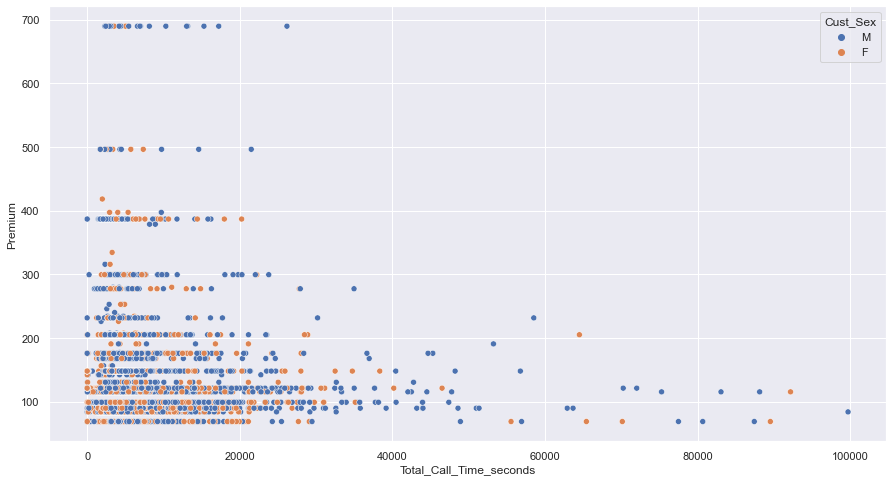

In [49]:
sns.scatterplot(x = "Total_Call_Time_seconds", y = "Premium", data = combined_time_premium.query("Total_Call_Time_seconds < 100000"), hue = "Cust_Sex")

In [50]:
call_time_male

,Cust_ID,Connection_ID,Emp_ID,Call_Time_seconds_x,avg_est_income,avg_bal_01,avg_bal_avail,wage_earner,Batch_ID,Premium,Cover_Amount,Benefit_Level,HistoryID,ListSegment,Team_ID,Total_Call_Time_seconds
Age,,,,,,,,,,,,,,,,
21.0,37599.0,2.131054e+09,20288.0,66.0570,6718.835,3463.0,2952.6,0.0,12.0,99.040,300000.0,250000.0,422129.0,1.0,288.0,206.0200
22.0,28713.0,2.134052e+09,20292.0,55.8320,8544.830,3675.0,3299.9,0.0,13.0,121.170,250000.0,200000.0,277149.0,1.0,288.0,172.1515
23.0,35613.0,2.134225e+09,20264.0,50.4560,8998.335,3565.0,3262.2,0.0,11.0,99.040,225000.0,250000.0,362305.0,1.0,288.0,165.8680
24.0,34260.0,2.133838e+09,20264.0,45.6130,10000.000,3557.0,3150.9,0.0,10.0,99.040,200000.0,250000.0,393925.5,1.0,288.0,173.1530
25.0,34602.0,2.133650e+09,20284.0,56.3935,10446.000,3203.0,3362.8,0.0,10.0,107.195,300000.0,250000.0,358030.0,1.0,288.0,175.4015
26.0,33623.0,2.133909e+09,20258.0,51.6530,11017.500,3119.0,3008.0,0.0,10.5,99.040,250000.0,250000.0,337765.0,1.0,276.0,172.8185
27.0,34755.0,2.133891e+09,20272.0,51.7740,11110.000,2717.5,2665.8,0.0,11.0,99.040,250000.0,250000.0,372500.0,1.0,288.0,175.5630
28.0,35493.0,2.133872e+09,20258.0,48.7550,11470.830,2406.0,2502.9,0.0,11.0,99.040,250000.0,250000.0,355255.5,1.0,288.0,179.3235
29.0,33986.5,2.133412e+09,20277.0,54.4650,12228.000,2524.0,2599.7,0.0,11.0,99.040,250000.0,200000.0,395326.0,1.0,288.0,181.8955


In [51]:
avg_call_time_male

,Cust_ID,Connection_ID,Emp_ID,Call_Time_seconds_x,avg_est_income,avg_bal_01,avg_bal_avail,wage_earner,Batch_ID,Premium,Cover_Amount,Benefit_Level,HistoryID,ListSegment,Team_ID,Total_Call_Time_seconds
Age,,,,,,,,,,,,,,,,
21.0,37106.071942,1.917488e+09,19903.683453,175.104014,8044.844348,10045.022059,9375.924638,0.0,11.788321,106.723000,300000.000000,211638.461538,461365.846154,1.028777,291.978417,424.216691
22.0,31740.273723,1.962471e+09,20064.277372,164.615193,11021.677601,9427.066176,8965.327206,0.0,12.307692,142.478571,391666.666667,182612.500000,341787.062500,1.007299,286.722628,391.921821
23.0,35489.976492,1.971575e+09,19909.244123,150.923094,11482.091605,10989.270909,10695.661413,0.0,11.633700,99.484615,225000.000000,183974.358974,372936.794872,1.025316,294.350814,343.552957
24.0,34027.178207,1.949800e+09,19984.582293,161.821116,12573.747692,9753.520501,9266.220729,0.0,10.940707,103.217647,215384.615385,228214.062500,389992.203125,1.009081,292.190692,401.935162
25.0,34533.695618,1.963902e+09,19960.744131,170.833250,13050.859976,8901.359780,8871.679389,0.0,11.279937,109.132667,272500.000000,214247.787611,370372.840708,1.026604,292.868545,361.731629
26.0,34212.951381,1.974977e+09,19927.997790,163.928526,13887.508053,7706.470817,7504.152978,0.0,11.189655,116.534200,308571.428571,206950.802139,357218.935829,1.013260,290.937017,382.201861
27.0,35363.217619,1.958236e+09,19950.412560,152.497624,14014.460803,7721.378070,7496.002218,0.0,11.461268,109.964138,224358.974359,212759.469697,361699.007576,1.017444,291.545137,398.836850
28.0,35094.522127,1.959006e+09,19945.642398,154.359645,14304.413826,7530.528376,7528.312028,0.0,11.567879,114.795412,250909.090909,198631.101190,363260.672619,1.016417,292.148108,435.700310
29.0,34669.513977,1.954469e+09,19956.305273,163.866485,14970.362605,6048.904701,6072.869739,0.0,11.367912,113.532133,257272.727273,185526.549865,378056.291105,1.026684,296.292884,461.364731


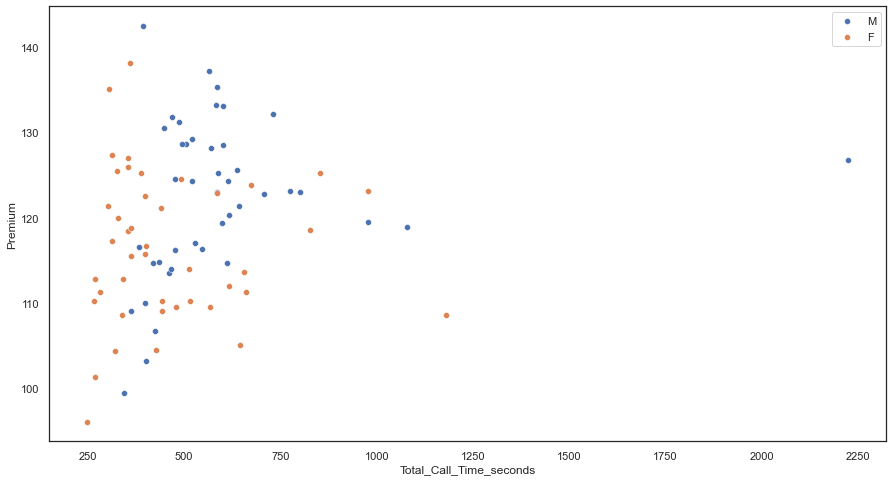

In [109]:
sns.scatterplot(x = "Total_Call_Time_seconds", y = "Premium", data = avg_call_time_male.query("Total_Call_Time_seconds < 3000"))
sns.scatterplot(x = "Total_Call_Time_seconds", y = "Premium", data = avg_call_time_female.query("Total_Call_Time_seconds < 2000"))
plt.legend(['M', 'F'])
sns.set_style("white")

In [134]:
time_premium_merged

,CampaignID,Cust_ID,Cust_Sex,Total_Call_Time_seconds,Premium
0,B8168,2919.0,M,189.906,99.04
1,B8168,6386.0,M,58.572,115.35
2,B8168,8755.0,M,178.151,115.35
3,B8168,57823.0,M,139.617,142.15
4,B8168,78428.0,M,130.343,142.15
...,...,...,...,...,...
331531,B8356,30489.0,M,6692.592,121.17
332351,B8356,63491.0,F,3055.537,121.17
333713,B8356,39045.0,F,6257.242,115.35
333777,B8356,8529.0,F,6594.450,89.71


In [145]:
#time_premium_merged_male = time_premium_merged_male["Cust_Sex == M"]
time_premium_merged_male = time_premium_merged[time_premium_merged["Cust_Sex"].str.contains("M")]
time_premium_merged_male

,CampaignID,Cust_ID,Cust_Sex,Total_Call_Time_seconds,Premium
0,B8168,2919.0,M,189.906,99.04
1,B8168,6386.0,M,58.572,115.35
2,B8168,8755.0,M,178.151,115.35
3,B8168,57823.0,M,139.617,142.15
4,B8168,78428.0,M,130.343,142.15
...,...,...,...,...,...
329905,B8356,13600.0,M,3592.264,89.71
329994,B8356,47668.0,M,3534.707,89.71
330026,B8356,59499.0,M,3565.433,89.71
331531,B8356,30489.0,M,6692.592,121.17


In [132]:
time_premium_merged = time_premium_merged.query("Total_Call_Time_seconds < 100000")

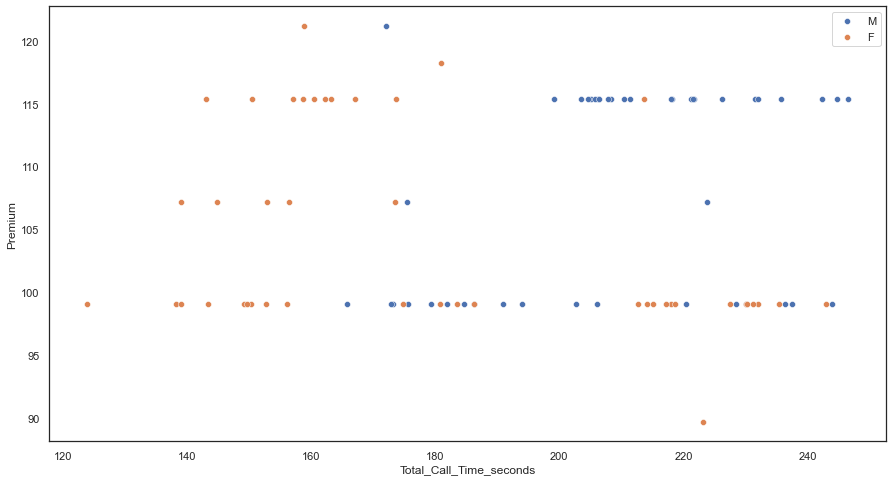

In [149]:
sns.scatterplot(x = "Total_Call_Time_seconds", y = "Premium", data = call_time_male)
sns.scatterplot(x = "Total_Call_Time_seconds", y = "Premium", data = call_time_female)
plt.legend(['M', 'F'])
sns.set_style("white")

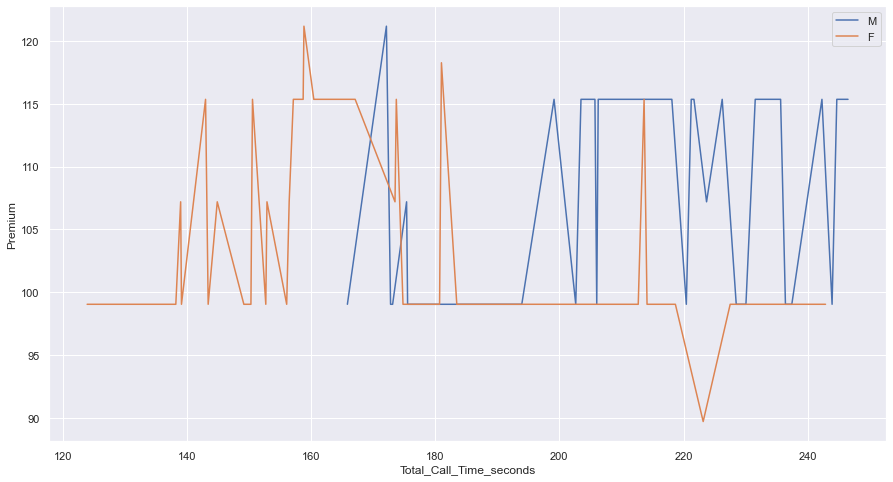

In [54]:
#sns.lineplot(x = "Avg_Call_Time_seconds", y = "Avg_Age_Premium", data = avg_time_premium)
sns.lineplot(x = "Total_Call_Time_seconds", y = "Premium", data = call_time_male.query("Total_Call_Time_seconds < 2000"))
sns.lineplot(x = "Total_Call_Time_seconds", y = "Premium", data = call_time_female)
plt.legend(['M', 'F'])

<AxesSubplot:xlabel='Total_Call_Time_seconds', ylabel='Premium'>

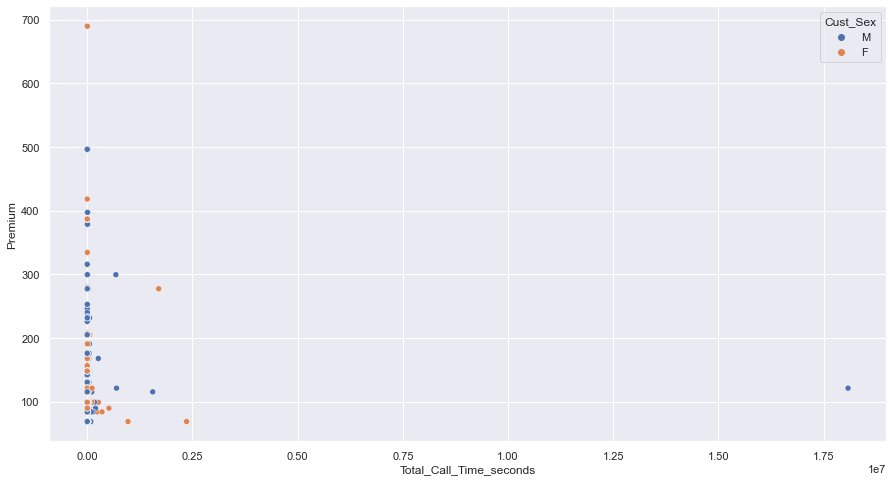

In [55]:
sns.scatterplot(x = "Total_Call_Time_seconds", y = "Premium", data = merged_time_vs_premium, hue = "Cust_Sex")

In [56]:
# it seems that having a higher call time doesn't mean having a higher premium value, but it seems as though 
# a higher call time does result in more sales resulting in premiums being sold
# Sara's input: maybe they're haggling so the call time is longer

# Check Sale Status vs Call_Time

In [57]:
sale_status = merged[["Sale_Status", "Total_Call_Time_seconds", "Cust_Sex"]]

In [58]:
sale_status = sale_status.dropna()

In [59]:
sale_status["Sale_Status"].unique()

array(['Cancelled', 'Accepted', 'Pending Verification',
       'Technically unverifiable', 'Not Verified', 'Sale_Sent',
       'Rejected', 'Verified Sale', 'Cancelled Sale in Crossell',
       'Posted', 'Non Verified Call Result', 'Not a Sale in Crossell'],
      dtype=object)

In [60]:
sale_status_cancelled = sale_status[sale_status['Sale_Status'].str.contains('Cancelled')]
sale_status_accepted = sale_status[sale_status['Sale_Status'].str.contains('Accepted')]

In [61]:
sale_status = sale_status[~sale_status['Sale_Status'].str.contains("Technically unverifiable")]

In [62]:
sale_status = sale_status[~sale_status['Sale_Status'].str.contains("Pending Verification")]
sale_status = sale_status[~sale_status['Sale_Status'].str.contains("Non Verified Call Result")]
sale_status = sale_status[~sale_status['Sale_Status'].str.contains("Cancelled Sale in Crossell")]

In [63]:
sale_status["Sale_Status"].unique()

array(['Cancelled', 'Accepted', 'Not Verified', 'Sale_Sent', 'Rejected',
       'Verified Sale', 'Posted', 'Not a Sale in Crossell'], dtype=object)

In [64]:
#sale_status = sale_status.query("Total_Call_Time_seconds <= 1000")

In [65]:
sale_status.sort_values("Sale_Status")

,Sale_Status,Total_Call_Time_seconds,Cust_Sex
52513,Accepted,6188.352,F
63886,Accepted,8104.295,F
63704,Accepted,17447.820,M
63589,Accepted,6374.164,M
63557,Accepted,3463.062,M
...,...,...,...
42840,Verified Sale,8327.456,M
47294,Verified Sale,5828.113,M
47295,Verified Sale,2327.020,F
47378,Verified Sale,3124.326,F


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Cancelled'),
  Text(1, 0, 'Accepted'),
  Text(2, 0, 'Not Verified'),
  Text(3, 0, 'Sale_Sent'),
  Text(4, 0, 'Rejected'),
  Text(5, 0, 'Verified Sale'),
  Text(6, 0, 'Posted'),
  Text(7, 0, 'Not a Sale in Crossell')])

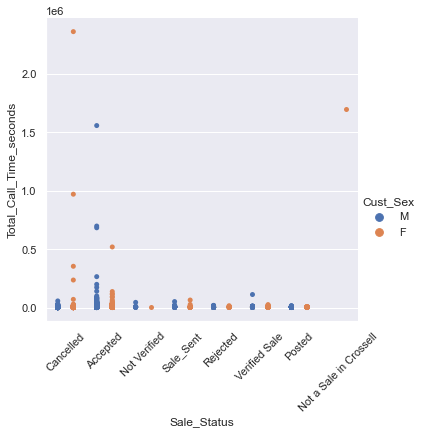

In [66]:
sns.catplot(x="Sale_Status", y="Total_Call_Time_seconds", hue="Cust_Sex", data=sale_status.query("Total_Call_Time_seconds < 10000000"), kind="strip", jitter = False, dodge = True)
plt.xticks(rotation=45)

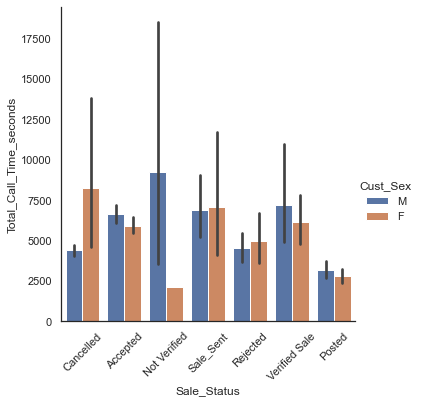

In [107]:
sns.catplot(x="Sale_Status", y="Total_Call_Time_seconds", hue="Cust_Sex", data=sale_status.query("Total_Call_Time_seconds < 1000000"), kind="bar")
plt.xticks(rotation=45)
sns.set_style("white")
# find number of instances for each category, group by category 
# change orientation of x axis to better read the labels

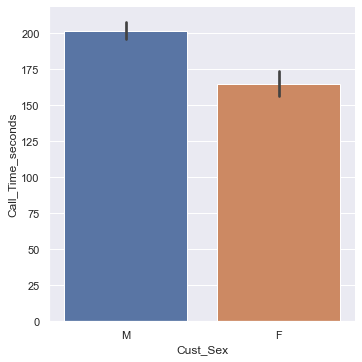

In [68]:
sns.catplot(x = "Cust_Sex", y = "Call_Time_seconds", data = data_post2021, kind = "bar")

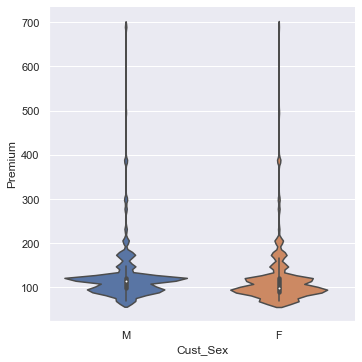

In [69]:
sns.catplot(x = "Cust_Sex", y = "Premium", data = data_post2021, kind = "violin")
# show number of people within each category to get a better understanding of the distribution

# Family to Cover vs Premium

In [70]:
family_premium = data_post2021[["Family_To_Cover", "Premium", "Cust_Sex"]]

In [71]:
family_premium.isnull().sum()

Family_To_Cover    1008902
Premium            1008902
Cust_Sex                 0
dtype: int64

In [72]:
family_premium.shape

(1146634, 3)

In [73]:
family_premium = family_premium.dropna()

In [74]:
family_premium["Family_To_Cover"].unique()

array(['Individual Only', 'Entire Family', 'Individual and Child',
       'Individual and Spouse'], dtype=object)

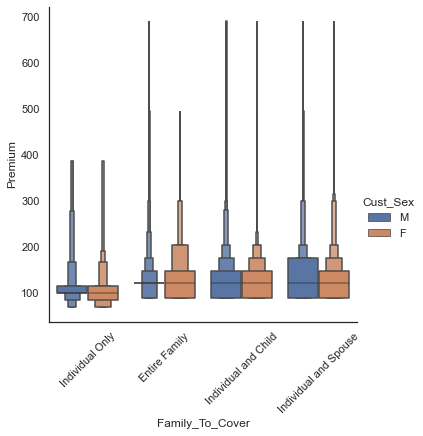

In [106]:
sns.catplot(x="Family_To_Cover", y="Premium", hue="Cust_Sex",
            data=family_premium, kind="boxen")
plt.xticks(rotation=45)
sns.set_style("white")

In [76]:
# Takeaway: Customers who are paying just for themselves tend to pay a lower premium than customers with at least
# one more person

# Policy Status

In [77]:
policy_status = data_post2021[["Policy_Status", "Premium", "Cust_Sex", "Age"]]

In [78]:
policy_status = policy_status.dropna()
policy_status

,Policy_Status,Premium,Cust_Sex,Age
5,C,115.35,M,50.0
6,C,115.35,M,50.0
7,C,115.35,M,50.0
8,C,115.35,M,50.0
9,A,115.35,M,40.0
...,...,...,...,...
1146629,A,83.88,F,23.0
1146630,A,83.88,F,23.0
1146631,A,89.71,M,48.0
1146632,A,89.71,M,48.0


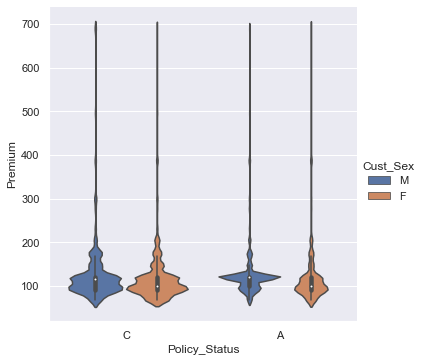

In [79]:
sns.catplot(x = "Policy_Status", y = "Premium", data = policy_status, hue = "Cust_Sex", kind = "violin")
# relabel x axis

<AxesSubplot:xlabel='Policy_Status', ylabel='Age'>

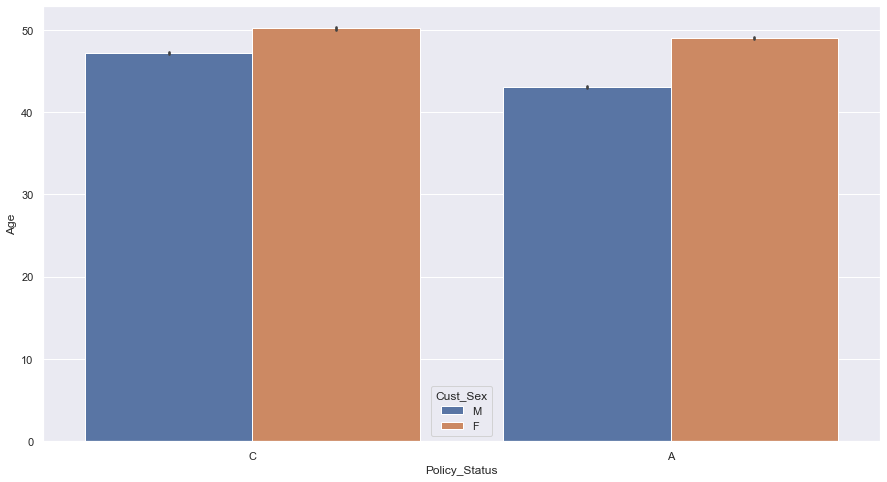

In [80]:
sns.barplot(x = "Policy_Status", y = "Age", data = policy_status, hue = "Cust_Sex")

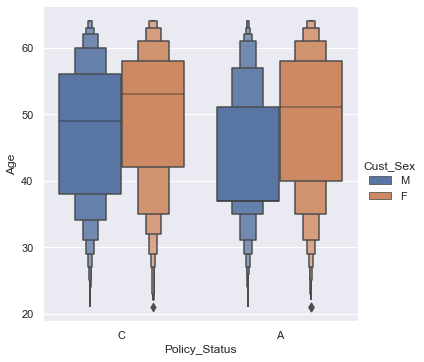

In [81]:
sns.catplot(x = 'Policy_Status', y = 'Age', data = policy_status, hue = "Cust_Sex", kind = "boxen")

# New Questions?

In [82]:
empID = data_post2021.groupby("Emp_ID", as_index = False).mean()
empID.isnull().sum()

Emp_ID                 0
Cust_ID                0
Connection_ID         69
Call_Time_seconds      0
avg_est_income         0
avg_bal_01             0
avg_bal_avail          0
wage_earner            0
Batch_ID               4
Age                    0
Premium              102
Cover_Amount         253
Benefit_Level          7
HistoryID              7
ListSegment            0
Team_ID                0
dtype: int64

In [83]:
empID = empID.rename(columns = {"Call_Time_seconds": "Emp_Avg_Calltime"})

Text(0.5, 1.0, 'Avg Call Time by Employee')

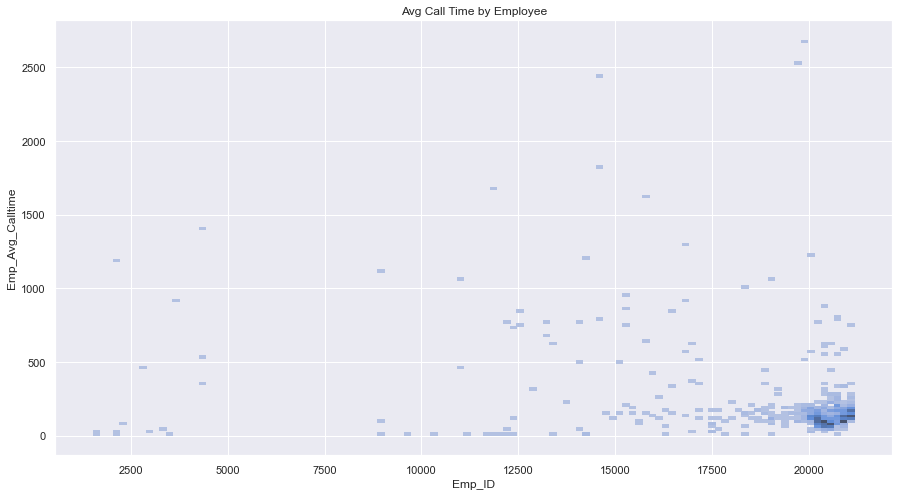

In [84]:
sns.histplot(x = "Emp_ID", y = "Emp_Avg_Calltime", data = empID.query("Emp_Avg_Calltime < 3000"))
plt.title("Avg Call Time by Employee")

In [85]:
empID_premium = empID[empID['Premium'].notna()]

<AxesSubplot:xlabel='Emp_ID', ylabel='Premium'>

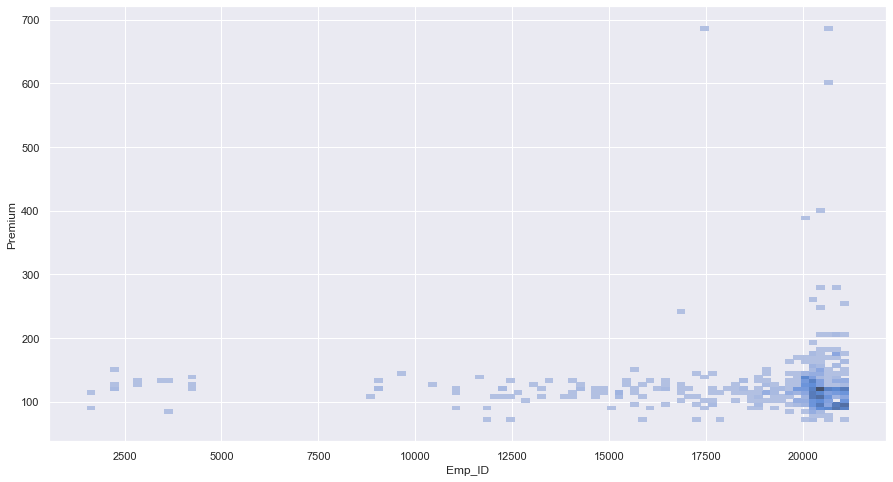

In [86]:
sns.histplot(x = "Emp_ID", y = "Premium", data = empID_premium)

In [87]:
data_post2021.columns

Index(['CampaignID', 'Cust_ID', 'Call_Start', 'Call_End', 'Call_Result',
       'Connection_ID', 'Emp_ID', 'Call_Time_seconds', 'avg_est_income',
       'avg_bal_01', 'avg_bal_avail', 'Marital_Status', 'wage_earner', 'ID_No',
       'Postal_Code', 'Cust_Sex', 'Lang', 'Batch_ID', 'Age', 'Policy_no',
       'Sale_Status', 'Sale_date', 'Verified_Date', 'Family_To_Cover',
       'Premium', 'Effective_Date', 'Date_of_Debit', 'Cover_Amount',
       'Product_Category', 'Benefit_Level', 'Cover_Level', 'Policy_Status',
       'CancelledDate', 'HistoryID', 'InceptionDateCorrected', 'ImportedDate',
       'Campaign_Type', 'ListSegment', 'Team_ID', 'EmploymentDate',
       'Employee_Gender', 'Race'],
      dtype='object')

In [88]:
data_post2021.isnull().sum()

CampaignID                      0
Cust_ID                         0
Call_Start                      0
Call_End                        0
Call_Result                     0
Connection_ID               31331
Emp_ID                          0
Call_Time_seconds               0
avg_est_income             167785
avg_bal_01                 161297
avg_bal_avail              158636
Marital_Status             164018
wage_earner                158636
ID_No                           0
Postal_Code                    49
Cust_Sex                        0
Lang                           55
Batch_ID                     5177
Age                             0
Policy_no                 1008902
Sale_Status               1008902
Sale_date                 1008902
Verified_Date             1051017
Family_To_Cover           1008902
Premium                   1008902
Effective_Date            1008902
Date_of_Debit             1009107
Cover_Amount              1044758
Product_Category           726455
Benefit_Level 

In [89]:
data_post2021.shape

(1146634, 42)

In [90]:
data_post2021["wage_earner"].unique()

array([nan,  0.])

In [91]:
data_post2021.groupby("Emp_ID").head()

,CampaignID,Cust_ID,Call_Start,Call_End,Call_Result,Connection_ID,Emp_ID,Call_Time_seconds,avg_est_income,avg_bal_01,...,CancelledDate,HistoryID,InceptionDateCorrected,ImportedDate,Campaign_Type,ListSegment,Team_ID,EmploymentDate,Employee_Gender,Race
0,B8168,2919.0,2021-01-04 08:36:53.870,2021-01-04 08:37:27.197,call back no presentation,2.129662e+09,8992.0,33.327,NaN,NaN,...,NaN,NaN,NaN,NaN,Acquisition,3.0,301.0,2008-07-24 09:25:46.560,F,A
1,B8168,2919.0,2021-01-04 15:50:08.380,2021-01-04 15:50:14.547,phone not answered / client does not speak,0.000000e+00,8992.0,6.167,NaN,NaN,...,NaN,NaN,NaN,NaN,Acquisition,3.0,301.0,2008-07-24 09:25:46.560,F,A
2,B8168,2919.0,2021-01-05 08:30:32.697,2021-01-05 08:31:28.167,call back no presentation,2.129782e+09,8992.0,55.470,NaN,NaN,...,NaN,NaN,NaN,NaN,Acquisition,3.0,301.0,2008-07-24 09:25:46.560,F,A
3,B8168,2919.0,2021-01-05 15:45:57.897,2021-01-05 15:46:11.643,phone not answered / client does not speak,0.000000e+00,8992.0,13.746,NaN,NaN,...,NaN,NaN,NaN,NaN,Acquisition,3.0,301.0,2008-07-24 09:25:46.560,F,A
4,B8168,2919.0,2021-01-07 13:57:47.107,2021-01-07 13:57:50.830,phone not answered / client does not speak,0.000000e+00,8992.0,3.723,NaN,NaN,...,NaN,NaN,NaN,NaN,Acquisition,3.0,301.0,2008-07-24 09:25:46.560,F,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146621,B8356,24482.0,2021-07-25 06:31:03.553,2021-07-25 06:55:31.863,"pending : unemployed, students or pensioner",NaN,12520.0,1468.310,3.00,108.0,...,NaN,NaN,NaN,NaN,Acquisition,1.0,243.0,2013-02-04 08:45:56.530,F,A
1146622,B8356,24482.0,2021-07-25 07:00:03.470,2021-07-25 07:00:06.540,query,NaN,12520.0,3.070,3.00,108.0,...,NaN,NaN,NaN,NaN,Acquisition,1.0,243.0,2013-02-04 08:45:56.530,F,A
1146623,B8356,27130.0,2021-07-24 12:49:28.977,2021-07-24 13:49:38.863,pending misrepresentation: questions - benefits,NaN,12520.0,3609.886,16100.33,3848.0,...,NaN,379984.0,2021-08-04 00:00:00.000,2021-09-28 14:02:27.377,Acquisition,1.0,243.0,2013-02-04 08:45:56.530,F,A
1146624,B8356,27130.0,2021-07-24 13:57:58.280,2021-07-24 13:58:01.200,pending misrepresentation: costs,NaN,12520.0,2.920,16100.33,3848.0,...,NaN,379984.0,2021-08-04 00:00:00.000,2021-09-28 14:02:27.377,Acquisition,1.0,243.0,2013-02-04 08:45:56.530,F,A


<AxesSubplot:xlabel='Emp_ID', ylabel='Count'>

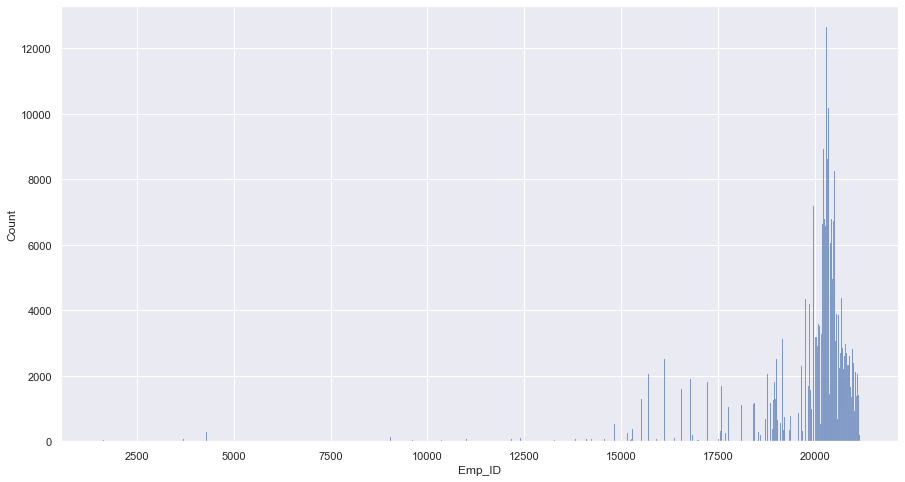

In [92]:
sns.histplot(x = "Emp_ID", data = merged)

In [93]:
product_category_data = merged[["Premium", "Product_Category", "Total_Call_Time_seconds", "Age"]]
product_category_data = product_category_data.dropna()
product_category_data

,Premium,Product_Category,Total_Call_Time_seconds,Age
1,115.35,Accidental Death And Permanent Disability,58.572,50.0
2,115.35,Accidental Death And Permanent Disability,178.151,40.0
4,142.15,Accidental Death And Permanent Disability,130.343,42.0
5,115.35,Accidental Death And Permanent Disability,236.153,28.0
11,147.98,Accidental Death And Permanent Disability,669.812,45.0
...,...,...,...,...
332351,121.17,Accidental Death And Permanent Disability,3055.537,56.0
332506,121.17,Accidental Death And Permanent Disability,117496.848,38.0
333713,115.35,Accidental Death And Permanent Disability,6257.242,53.0
333777,89.71,Accidental Death And Permanent Disability,6594.450,51.0


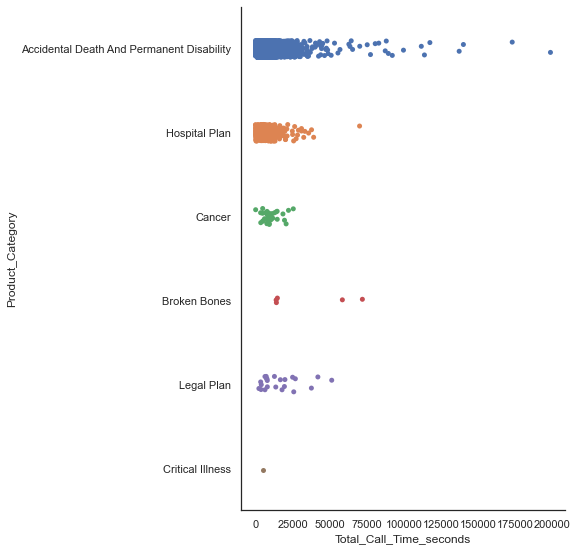

In [105]:
sns.catplot(x = "Total_Call_Time_seconds", y = "Product_Category", data = product_category_data.query("Total_Call_Time_seconds < 250000"), kind = 'strip')
plt.gcf().set_size_inches(15, 8)
sns.set_style("white")

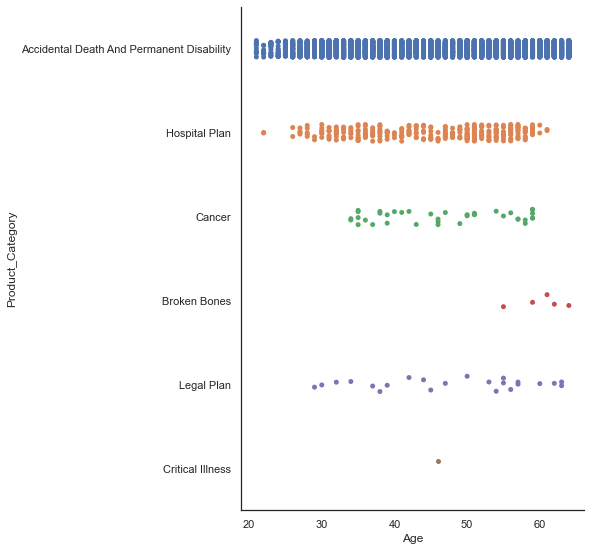

In [104]:
sns.catplot(x = "Age", y = "Product_Category", data = product_category_data.query("Total_Call_Time_seconds < 250000"), kind = 'strip')
plt.gcf().set_size_inches(15, 8)
sns.set_style("white")

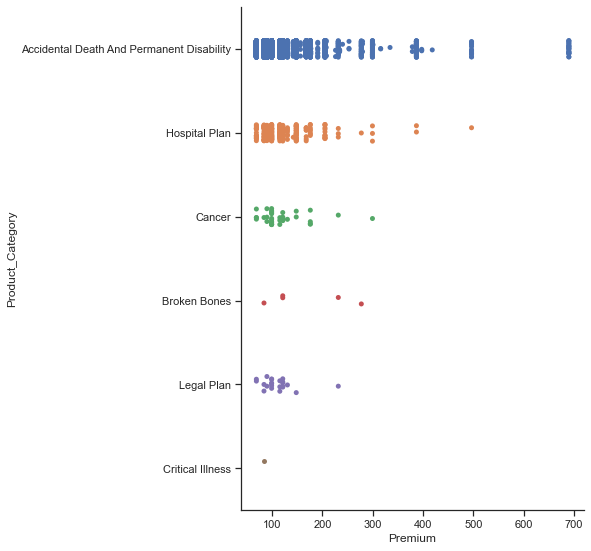

In [103]:
sns.catplot(x = "Premium", y = "Product_Category", data = product_category_data, kind = 'strip')
plt.gcf().set_size_inches(15, 8)
sns.set_style("white")

In [97]:
# make line graphs simpler, scatterplots simpler as well
# try to look into other questiosn

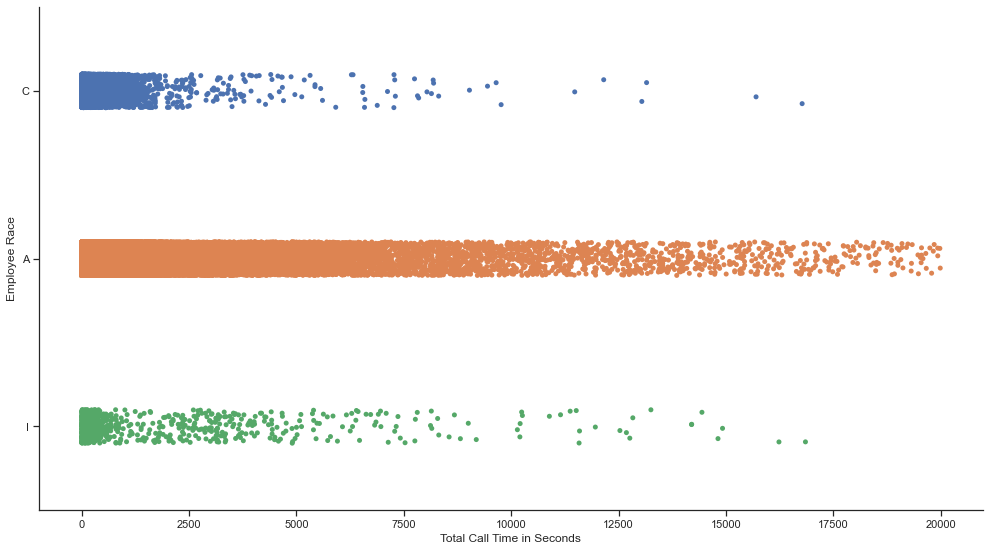

In [101]:
p = sns.catplot(x = "Total_Call_Time_seconds", y = "Race", data = merged.query("Total_Call_Time_seconds < 20000"), kind = 'strip')
plt.gcf().set_size_inches(15, 8)
p.set(xlabel = "Total Call Time in Seconds", ylabel = "Employee Race")